#Proyecto Final

# Predicción de Diabetes en México (2000-2023)
**Predicciones para 2024-2025**

Por:

- Ana Cristina Cuevas Garcia

##**Planteamiento del problema**

###¿Qué es la Diabetes?

La diabetes es una enfermedad **crónica** caracterizada por mantener elevados los niveles de azúcar (glucosa) en sangre, esto, asociado a la deficiencia de insulina, afecta al corazón, ojos, riñones y sistema nervioso.

###**Causas:**
La causa principal de la diabetes son los **malos hábitos alimenticios** llenos de *azúcares refinadas, grasas saturadas y sodio*, le sumamos a esto el sedentarismo, la obesidad y el factor genético.

###**Existen tres tipos de diabetes:**

- **Diabetes Tipo 1.** Suele aparecer con mayor frecuencia en la juventud, afectando directamente al páncreas al producir poca o nada de insulina.

- **Diabetes Tipo 2.** Es el tipo de diabetes más común, sucede cuando el cuerpo es incapaz de producir insulina y se acumula la glucosa en la sangre; representa la mayoría de los casos y se manifiesta generalmente en adultos, muchas veces con obesidad o hipertensión.

- **Diabetes gestacional.** Esta se presenta durante el embarazo a causa de los cambios que sufre el cuerpo propios en ese estado y suele darse en una etapa avanzada de la gestación, aunque normalmente desaparece tras dar a luz.

###**Síntomas:**

Los síntomas son diferentes dependiendo el tipo de diabetes, pero cuando los niveles de azúcar son altos, se presenta:
- una sensación de mucha hambre y sed
- incluso llegar a perder peso
- necesidad de orinar muy a menudo
- sentir cansancio.

Por otro lado, en las personas con diabetes tipo 2 es común no presentar síntomas al inicio, incluso es posible que no los tengan durante muchos años. En estos casos, la detección de la diabetes suele darse mediante un análisis de sangre, pero se puede reconocer la enfermedad ante síntomas como disfunción eréctil, visión borrosa y dolor o entumecimiento en los pies o las manos

###**Prevención:**

Las personas con alto riesgo de desarrollar diabetes tipo 2, pueden disminuirlo significativamente, realizando cambios en su estilo de vida y mantenerlos a largo plazo, como:

 Adopción de una alimentación saludable.
 Incremento de la actividad física moderada.
 Mantener un peso saludable
 Abandono del tabaquismo.




##Objetivo

Actualmente en nuestro país, la diabetes es la **tercera causa de muerte**; es posible que más de cien mil personas mueran al año por esta enfermedad, dentro de estas cifras, las personas mayores de 65 años ocupan el primer lugar en muertes. Los niños no están exentos, e inclusive pueden nacer con esta enfermedad a causa de la famosa diabetes gestacional que suele darle a la madre durante el embarazo.
La ideaprincipal es:
-  analizar la evolucion de casos de diabetes por estado (2000-2023)
- Desarrollar un modelo predictivo para 2024-2025
- Identificar patrones y tendencias significativas para el desarrollo del proyecto.


##**¿Cómo se hará?**

Primero obtendremos nuestra base de datos de la página del instituto méxicano del instituto social, el link es el siguiente:

- http://datos.imss.gob.mx/dataset/informacion-en-salud/resource/60f146be-1528-4abe-8ecc-5daf8f8ca05c#{}

Como puede notarse la seguridad del protocolo HTTP, no se encuentra en este hipervinculo, gracias a la ausencia de ésta, podemos ver la base de datos.



##**Preprocesamiento de Datos**

In [1]:
#Vamos a importar las bibliotecas necesarias:

#Principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import sys
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

## Machine Learning
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

# Series de tiempo
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from prophet.plot import plot_plotly

# Instalar Prophet si no está instalado
!pip install prophet --quiet



# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
#---------------------------------------------------------------------------------------------------------------------
#Aquí instalaremos otras bibliotecas para garantizar que se encuentren en cada ordenador que visualice éste proyecto.
def install_packages():
    packages = [
        'plotly>=5.0.0',
        'prophet',
        'statsmodels',
        'seaborn',
        'scikit-learn',
        'xgboost',
        'lightgbm',
        'shap',
        'optuna'
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} instalado correctamente")
        except:
            print(f"❌ Error instalando {package}")
#--------------------------------------------------------------------------------------------------------------------

In [2]:
#Para iniciar, necesitamos el path para cargar los datos y para ello, nos conectaremos al drive:

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/PrediccionDiabetes/diabetes2000-2023.csv")
#-------------------------------------------------------------------------------------------------------------------

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#vamos a observar el total de datos (respecto a filas y columnas)
df.shape
#Antes constaba de 36 filas y 25 columnas, pero edité el excel, por cuestiones que vemos más abajo.

(33, 26)

Podemos observar que contamos con 36 filas y 25 columnas


In [4]:
#Vamos a observar nuestras dimensiones
df.ndim

2

confirmamos que el dataset es una matriz bidimensional, por ende trabajaremos con dos dimensiones, en este caso son los estados, y la cantidad de personas que padecen de diabetes.

In [5]:
#A continuación una representación de lo que obteniamos al llamar la base de datos

In [6]:
#df.head(36)

| Detección de padecimientos. Diabetes. Delegaciones |
-
| Total
|Aguascalientes
|Baja California
|Baja California sur
|Campeche
|Coahuila
|Colima
|Chiapas
|Chihuahua
|D.F. Norte
|D.F. Sur
|Durango
|Guanajuato
|Guerrero
|Hidalgo
|Jalisco
|mexico oriente
|mexico ponniente
|Michoacan
|Morelos
|Nayarit
|Nuevo Leon
|Oaxaca
|Puebla
|Queretaro
|Quintana Roo
|San Luis Potosi
|Sinaloa
|Sonora
|Tabasco
|Tamaulipas
|Tlaxcala
|Veracruz norte
|Veracruz sur
|Yucatan
|Zacatecas

Como podemos observar, las filas es el total de estados de la república mexicana, y las columnas es la informacion que tenemos por año, esto quiere decir que esta base de datos contiene información desde el año 2000 hasta el 2023 Y las dos columnas extras son "Total" y "Detección de padecimientos. Diabetes. Delegaciones"

Podemos notar, que estados como CDMX (D.F. Norte y D.F. Sur), Estado de méxico (México Oriente y México Poniente) y Veracruz (Veracruz Norte y Veracruz Sur) estan divididos en dos, lo que haremos para tener el total de cada uno de estos estados divididos, es sumar el total para tener los casos por el estado total.
Como adicional, agregué la poblacion total obtenida más reciente, en este caso del censo realizado en el año 2020, agregué esta columna llamada "PobTot2020".

Este procedimiento fué hecho en Microsoft Excel, por lo que volveré a cargar la base de datos:

In [7]:
df = pd.read_csv("/content/drive/MyDrive/PrediccionDiabetes/diabetes2000-2023.csv")

In [8]:
#Limpiamos nombres de columnas y estados
df.columns = df.columns.str.strip()
df['Estados'] = df['Estados'].str.strip()

In [9]:
#Separamos los datos de la población
poblacion_2020 = df[['Estados', 'PobTot2020']].copy()

In [10]:
#Datos principales excluyendo población
df_main = df.drop('PobTot2020', axis=1)

In [11]:
#Formato largo
df_long = pd.melt(df_main,
                      id_vars=['Estados'],
                      var_name='Año',
                      value_name='Casos')

In [12]:
#Convertimos el año a entero (int)
df_long['Año'] = df_long['Año'].astype(int)

In [13]:
#Merge con la población
df_long = df_long.merge(poblacion_2020, on='Estados', how='left')

In [14]:
#Calculamos la tasa per cápita (por 100000 habitantes)
df_long['Tasa_por_100k'] = (df_long['Casos'] / df_long['PobTot2020']) * 100000

In [15]:
#Eliminamos la fila de "Total" para el análisis por estados
#Ademas de tener la siguiente informacion por df:
#df_estados: Contiene datos por cada estado
#df_total: Contiene datos de toda la republica mexicana
df_estados = df_long[df_long['Estados'] != 'Total'].copy()
df_total = df_long[df_long['Estados'] == 'Total'].copy()


In [16]:
df.head()

,Estados,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,PobTot2020
0,Total,5185103,5230196,5361306,6194077,6790874,1851072,2721421,5484550,6908780,...,12715083,14360224,13883455,13656681,12790109,7269540,10258345,13146251,15801491,12601424
1,Aguascalientes,67543,76375,77405,74338,74935,21357,29483,78604,133158,...,234123,228371,235856,194442,161409,86265,134128,182988,190098,1425607
2,Baja California,122240,123325,113658,178379,158505,42437,73488,206365,253983,...,582879,585283,657032,581767,496810,240628,403733,580768,783025,3769020
3,Baja California Sur,29843,34749,34263,38348,89279,13408,21050,43319,65500,...,73752,105938,97552,106368,88486,55146,80318,184251,201821,798447
4,Campeche,41807,41366,46574,53694,63447,13777,24160,29228,20968,...,67127,108251,91410,72631,67295,33898,67943,77430,117849,928363


Vamos a observar "df_estados" y "df_Total"
La transformacion de estas bases de datos, fue el orden de los años por columna a los años por fila, para que sea mejor el manejo de la información al momento de crear las series de tiempo.

In [17]:
df_estados.head()

,Estados,Año,Casos,PobTot2020,Tasa_por_100k
1,Aguascalientes,2000,67543,1425607,4737.841495
2,Baja California,2000,122240,3769020,3243.283400
3,Baja California Sur,2000,29843,798447,3737.630676
4,Campeche,2000,41807,928363,4503.303126
5,Coahuila,2000,179643,3146771,5708.804358


In [18]:
df_estados.tail()

,Estados,Año,Casos,PobTot2020,Tasa_por_100k
787,Tamaulipas,2023,762855,3527735,21624.498439
788,Tlaxcala,2023,111594,1342977,8309.449827
789,Veracruz,2023,818274,8062579,10149.035439
790,Yucatán,2023,270760,2320898,11666.174041
791,Zacatecas,2023,101002,1622138,6226.473950


Podemos observar el total de casos por año también

In [19]:
df_total.head()

,Estados,Año,Casos,PobTot2020,Tasa_por_100k
0,Total,2000,5185103,12601424,41146.960851
33,Total,2001,5230196,12601424,41504.801362
66,Total,2002,5361306,12601424,42545.239332
99,Total,2003,6194077,12601424,49153.786112
132,Total,2004,6790874,12601424,53889.735001


In [20]:
df_total.tail()

,Estados,Año,Casos,PobTot2020,Tasa_por_100k
627,Total,2019,12790109,12601424,101497.330778
660,Total,2020,7269540,12601424,57688.242218
693,Total,2021,10258345,12601424,81406.236311
726,Total,2022,13146251,12601424,104323.535181
759,Total,2023,15801491,12601424,125394.487163


 ## Análisis exploratorio de datos (EDA)

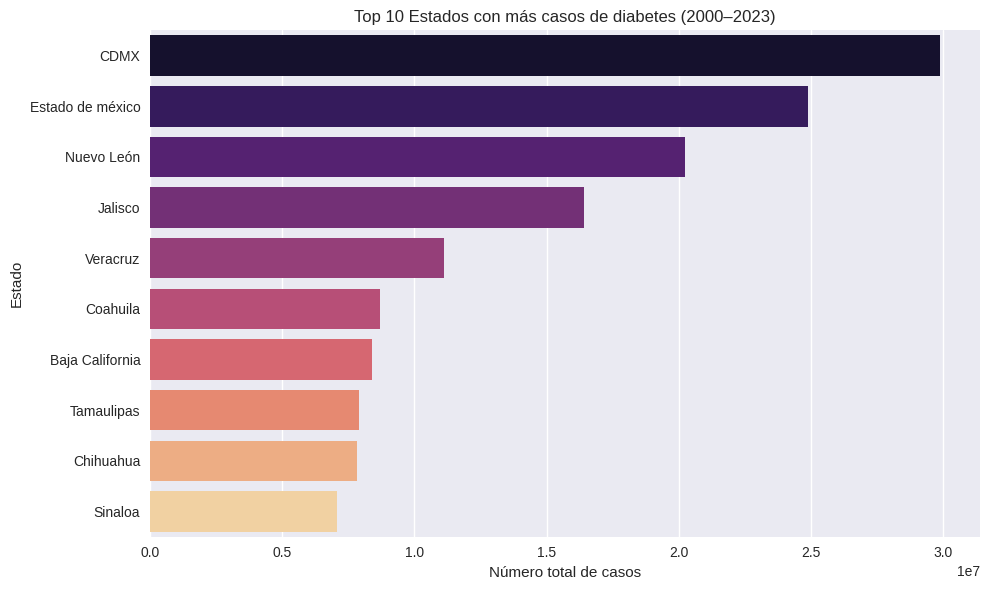

In [21]:
# Vamos a ordenar del estado con más casos de diabetes (Top 10)
top_estados = df_estados.groupby("Estados")["Casos"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_estados.values, y=top_estados.index, palette="magma")
plt.title("Top 10 Estados con más casos de diabetes (2000–2023)")
plt.xlabel("Número total de casos")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()

Podemos observar en el top 10 estados con mayores casos de diabetes en total, inclusive podemos centrarnos en los 5 más afectados:

- CDMX
- Estado de méxico
- Nuevo León
- Jalisco
- Veracruz

Esto, en el periodo de 2000 a 2023

In [22]:
#Vamos a crear un gráfico interactivo de series de tiempo, por estado
def create_interactive_time_series(df, title="Serie Temporal de Casos de Diabetes durante 2000 - 2023"):
    fig = go.Figure()

    # Calcular top 10 estados por casos promedio
    top_estados = (df.groupby('Estados')['Casos']
                   .mean()
                   .sort_values(ascending=False)
                   .head(10)
                   .index.tolist())

    colors = px.colors.qualitative.Set3

    for i, estado in enumerate(top_estados):
        estado_data = df[df['Estados'] == estado].sort_values('Año')

        fig.add_trace(go.Scatter(
            x=estado_data['Año'],
            y=estado_data['Casos'],
            mode='lines+markers',
            name=estado,
            line=dict(width=2, color=colors[i % len(colors)]),
            marker=dict(size=6),
            hovertemplate=f'<b>{estado}</b><br>' +
                         'Año: %{x}<br>' +
                         'Casos: %{y:,.0f}<br>' +
                         '<extra></extra>'
        ))

    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,
            font=dict(size=20, color='#2E4057')
        ),
        xaxis_title="Año",
        yaxis_title="Número de Casos",
        hovermode='x unified',
        template='plotly_white',
        height=600,
        showlegend=True,
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.02
        )
    )

    fig['layout']['xaxis'].update(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig['layout']['yaxis'].update(showgrid=True, gridwidth=1, gridcolor='lightgray')

    return fig

fig_interactive_time_series = create_interactive_time_series(df_estados)
fig_interactive_time_series.show()

Vemos que a lo largo de los años, han habido cambios, hay picos varíos altos por estado, pero podemos notar que todos decaen en 2020 y en 2022, depues toman la alza en 2023.

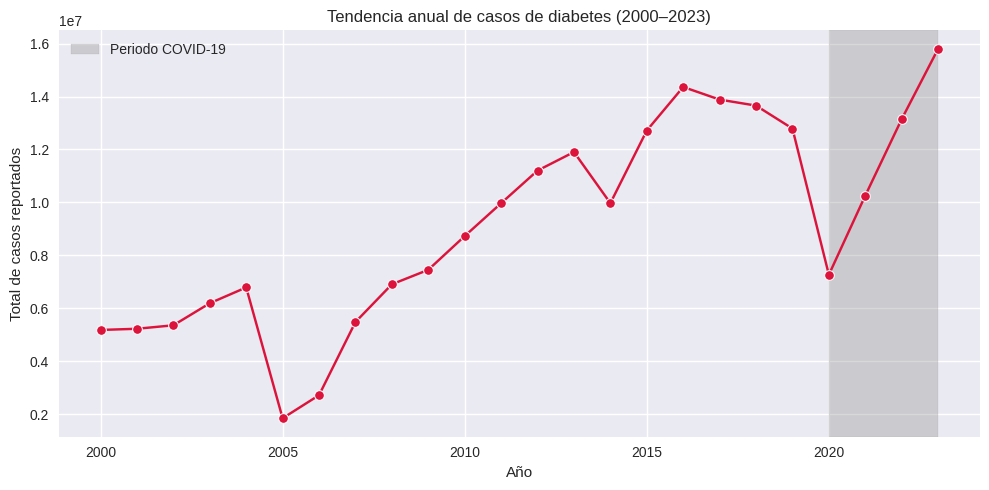

In [23]:
# Agrupamos por año
casos_por_año = df_estados.groupby("Año")["Casos"].sum().reset_index()

# Visualizamos la grafica
plt.figure(figsize=(10, 5))
sns.lineplot(data=casos_por_año, x="Año", y="Casos", marker="o", color="crimson")
plt.axvspan(2020, 2023, color='gray', alpha=0.3, label='Periodo COVID-19')
plt.title("Tendencia anual de casos de diabetes (2000–2023)")
plt.xlabel("Año")
plt.ylabel("Total de casos reportados")
plt.legend()
plt.tight_layout()
plt.show()


Esta grafica nos muestra el comportamiento sobre la cantidad de casos de diabetes registrados por el IMSS en el pais y podemos observar que la tendencia siempre va a la alza, exeptuando el año 2005, 2014 y el periodo Covid-19 que el es que marca la gráfica en color gris, 2020, que a pesar de tener una decaida pronunciada, los siguientes años tuvo un alto crecimiento.

In [24]:
#Creamos un heat map
def create_heatmap_estados_años(df, metric='Casos'):

    # Pivot table
    pivot_data = df.pivot(index='Estados', columns='Año', values=metric)

    # Ordenamos por promedio descendente
    pivot_data = pivot_data.loc[pivot_data.mean(axis=1).sort_values(ascending=False).index]

    fig = go.Figure(data=go.Heatmap(
        z=pivot_data.values,
        x=pivot_data.columns,
        y=pivot_data.index,
        colorscale='amp',
        hoverongaps=False,
        hovertemplate='Estado: %{y}<br>Año: %{x}<br>Casos: %{z:,.0f}<extra></extra>'
    ))

    fig.update_layout(
        title=f'Heatmap: {metric} por Estado y Año',
        xaxis_title='Año',
        yaxis_title='Estado',
        height=800,
        template='plotly_white'
    )

    return fig

fig_heatmap = create_heatmap_estados_años(df_estados)
fig_heatmap.show()

##**Modelo**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Predicción ARIMA 2024 y 2025:
2024    1.575016e+07
2025    1.478006e+07
Name: predicted_mean, dtype: float64


INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfwy5i7l/jku9_smg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfwy5i7l/nu92tmi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4956', 'data', 'file=/tmp/tmptfwy5i7l/jku9_smg.json', 'init=/tmp/tmptfwy5i7l/nu92tmi9.json', 'output', 'file=/tmp/tmptfwy5i7l/prophet_modelmr1cuz8a/prophet_model-20250613223614.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:36:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:36:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Predicción Prophet 2024 y 2025:
           ds          yhat
25 2024-12-31  1.516728e+07
26 2025-12-31  1.561522e+07


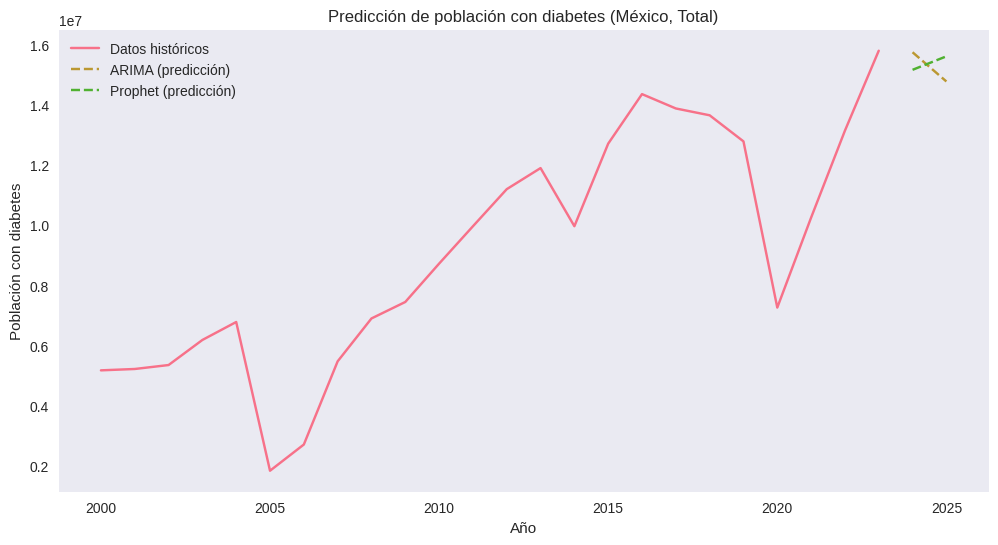

In [25]:
# Filtramos la fila "Total"
total_df = df[df["Estados"] == "Total"].drop(columns=["Estados", "PobTot2020"])

# Transponemos y preparamos los datos para series de tiempo
total_series = total_df.T
total_series.columns = ["Total"]
total_series.index = total_series.index.astype(int)

# ------------------------------------------------------------------------------
# Modelo ARIMA
# ------------------------------------------------------------------------------
# Ajustamos el modelo ARIMA automáticamente
model_arima = ARIMA(total_series, order=(2,1,2))  # Puedes usar auto_arima para mejor selección
arima_result = model_arima.fit()

# Predecimos 2 años (2024, 2025)
forecast_arima = arima_result.forecast(steps=2)
forecast_arima.index = [2024, 2025]

# Mostramos predicciones ARIMA
print("Predicción ARIMA 2024 y 2025:")
print(forecast_arima)

# ------------------------------------------------------------------------------
# Modelo Prophet
# ------------------------------------------------------------------------------
# Preparamos los datos para Prophet
prophet_df = total_series.reset_index()
prophet_df.columns = ["ds", "y"]
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"], format="%Y")

# Creamos y entrenar modelo Prophet
model_prophet = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model_prophet.fit(prophet_df)

# Creamos dataframe futuro
future = model_prophet.make_future_dataframe(periods=3, freq="Y")
forecast_prophet = model_prophet.predict(future)

# Extraemo predicción 2024 y 2025
forecast_filtered = forecast_prophet[forecast_prophet["ds"].dt.year.isin([2024, 2025])][["ds", "yhat"]]

# Mostramo predicciones Prophet
print("\nPredicción Prophet 2024 y 2025:")
print(forecast_filtered)

# Graficamos resultados
plt.figure(figsize=(12, 6))
plt.plot(total_series, label="Datos históricos")
plt.plot(forecast_arima, label="ARIMA (predicción)", linestyle="--")
plt.plot(forecast_filtered["ds"].dt.year, forecast_filtered["yhat"].values, label="Prophet (predicción)", linestyle="--")
plt.title("Predicción de población con diabetes (México, Total)")
plt.xlabel("Año")
plt.ylabel("Población con diabetes")
plt.legend()
plt.grid()
plt.show()


Debido a que ambos modelos presentaron datos similares, vamos a optar por escoger un unico modelo, y será elegido despues de evaluar algunas métricas de desempeño para cada modelo, las metricas seleccionadas son: RMSE y R^2

In [26]:
# Valores reales (2000–2023)
y_true = total_series["Total"].values

# ----------------------------------------------------------------------------
#     ARIMA
#-----------------------------------------------------------------------------
# Predicciones internas (ajustadas) del modelo ARIMA
arima_fitted = arima_result.fittedvalues
arima_fitted_eval = arima_result.fittedvalues


# Cálculamos las métricas de ARIMA
rmse_arima = np.sqrt(mean_squared_error(y_true, arima_fitted_eval))
r2_arima = r2_score(y_true, arima_fitted_eval)


# ------------------------------------------------------------------------------
#     Prophet
#-------------------------------------------------------------------------------
# Filtramos predicciones del modelo Prophet para 2000–2023
prophet_pred_eval = forecast_prophet.iloc[:len(y_true)]['yhat'].values


# Cálculamos las métricas de Prophet
rmse_prophet = np.sqrt(mean_squared_error(y_true, prophet_pred_eval))
r2_prophet = r2_score(y_true, prophet_pred_eval)

# Mostramos resultados
print(f"ARIMA RMSE: {rmse_arima:.2f}, R²: {r2_arima:.4f}")
print(f"Prophet RMSE: {rmse_prophet:.2f}, R²: {r2_prophet:.4f}")

ARIMA RMSE: 2254944.06, R²: 0.6511
Prophet RMSE: 2220346.22, R²: 0.6617


Segun nuestras métricas, prophet es ligeramente superior, por lo que tomaremos éste modelo para continuar, por lo que intentaremos mejorarlo.

In [27]:
# Usando Prophet
future = model_prophet.make_future_dataframe(periods=3, freq='Y')
forecast = model_prophet.predict(future)

fig = plot_plotly(model_prophet, forecast)
fig.update_layout(title="Proyección de Casos de Diabetes hasta 2025")
fig.show()

In [30]:
# Cargamos nuestro archivo df_estados.csv
df_estados = pd.read_csv("df_estados.csv")

# Creamos DataFrame final
df_predicciones = pd.DataFrame()

# Ajustamos modelo Prophet por estado
for estado in df_estados['Estados'].unique():
    df_estado = df_estados[df_estados['Estados'] == estado][['Año', 'Casos']].copy()
    df_estado = df_estado.rename(columns={'Año': 'ds', 'Casos': 'y'})
    df_estado['ds'] = pd.to_datetime(df_estado['ds'], format='%Y')

    # Ajustamos modelo
    modelo = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    modelo.fit(df_estado)

    # Predecimos para 2024 y 2025
    futuro = modelo.make_future_dataframe(periods=3, freq='Y')
    pred = modelo.predict(futuro)
    pred_df = pred[['ds', 'yhat']]
    pred_df = pred_df[pred_df['ds'].dt.year.isin([2024, 2025])]
    pred_df['Estados'] = estado
    pred_df = pred_df.rename(columns={'yhat': 'Casos'})

    # Históricos
    historico = df_estado[['ds', 'y']].copy()
    historico['Estados'] = estado
    historico = historico.rename(columns={'y': 'Casos'})

    # Combinamos
    combinado = pd.concat([historico, pred_df], ignore_index=True)
    df_predicciones = pd.concat([df_predicciones, combinado], ignore_index=True)

# Limpiamos columnas
df_predicciones['Año'] = df_predicciones['ds'].dt.year
df_predicciones = df_predicciones[['Estados', 'Año', 'Casos']].sort_values(by=['Estados', 'Año'])

# Guardamos nuevo .csv
df_predicciones.to_csv("predicciones_2000_2025.csv", index=False)


INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfwy5i7l/6l0qdtyc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfwy5i7l/rfojwcm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31784', 'data', 'file=/tmp/tmptfwy5i7l/6l0qdtyc.json', 'init=/tmp/tmptfwy5i7l/rfojwcm4.json', 'output', 'file=/tmp/tmptfwy5i7l/prophet_modelotr0memc/prophet_model-20250613223718.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:37:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:37:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfwy5i7l/4lv_y3j9.json
DEBUG:cmdstanpy:input tempfi

In [31]:
# Creamos gráfico interactivo para df_predicciones
def create_interactive_time_series(df, title="Serie Temporal de Casos de Diabetes por Estado (2000–2025)"):
    fig = go.Figure()

    # Calculamos top 10 estados por promedio de casos
    top_estados = (df.groupby('Estados')['Casos']
                   .mean()
                   .sort_values(ascending=False)
                   .head(10)
                   .index.tolist())

    colors = px.colors.qualitative.Set3

    for i, estado in enumerate(top_estados):
        estado_data = df[df['Estados'] == estado].sort_values('Año')

        fig.add_trace(go.Scatter(
            x=estado_data['Año'],
            y=estado_data['Casos'],
            mode='lines+markers',
            name=estado,
            line=dict(width=2, color=colors[i % len(colors)]),
            marker=dict(size=6),
            hovertemplate=f'<b>{estado}</b><br>' +
                         'Año: %{x}<br>' +
                         'Casos: %{y:,.0f}<br>' +
                         '<extra></extra>'
        ))

    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,
            font=dict(size=20, color='#2E4057')
        ),
        xaxis_title="Año",
        yaxis_title="Número de Casos",
        hovermode='x unified',
        template='plotly_white',
        height=600,
        showlegend=True,
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.02
        )
    )

    fig['layout']['xaxis'].update(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig['layout']['yaxis'].update(showgrid=True, gridwidth=1, gridcolor='lightgray')

    return fig

# Usamos la función con df_predicciones
fig_interactive_time_series = create_interactive_time_series(df_predicciones)
fig_interactive_time_series.show()

Volvemos a generar nuestra gráfica, pero incluímos nuestros años predichos 2024 y 2025, podemos observar una ligera baja, pero finalmente en 2025 hay una alza.

In [32]:
# Reutilizamos el mismo diccionario de coordenadas de capitales de estado
coordenadas_estados = {
    'Aguascalientes': {'lat': 21.8853, 'lon': -102.2916},
    'Baja California': {'lat': 32.6245, 'lon': -115.4523},
    'Baja California Sur': {'lat': 24.1444, 'lon': -110.3009},
    'Campeche': {'lat': 19.8301, 'lon': -90.5349},
    'Chiapas': {'lat': 16.7569, 'lon': -93.1292},
    'Chihuahua': {'lat': 28.6353, 'lon': -106.0889},
    'CDMX': {'lat': 19.4326, 'lon': -99.1332},
    'Coahuila': {'lat': 25.4232, 'lon': -101.0053},
    'Colima': {'lat': 19.2452, 'lon': -103.7240},
    'Durango': {'lat': 24.0277, 'lon': -104.6532},
    'Estado de méxico': {'lat': 19.3564, 'lon': -99.6562},
    'Guanajuato': {'lat': 21.0190, 'lon': -101.2574},
    'Guerrero': {'lat': 17.4392, 'lon': -99.5451},
    'Hidalgo': {'lat': 20.0911, 'lon': -98.7624},
    'Jalisco': {'lat': 20.6597, 'lon': -103.3496},
    'Michoacán': {'lat': 19.5665, 'lon': -101.7068},
    'Morelos': {'lat': 18.6813, 'lon': -99.1013},
    'Nayarit': {'lat': 21.7514, 'lon': -104.8455},
    'Nuevo León': {'lat': 25.5428, 'lon': -99.9037},
    'Oaxaca': {'lat': 17.0732, 'lon': -96.7266},
    'Puebla': {'lat': 19.0414, 'lon': -98.2063},
    'Querétaro': {'lat': 20.5888, 'lon': -100.3899},
    'Quintana Roo': {'lat': 21.1619, 'lon': -86.8515},
    'San Luis Potosí': {'lat': 22.1565, 'lon': -100.9855},
    'Sinaloa': {'lat': 24.8049, 'lon': -107.3741},
    'Sonora': {'lat': 29.2972, 'lon': -110.3309},
    'Tabasco': {'lat': 17.8409, 'lon': -92.6189},
    'Tamaulipas': {'lat': 24.2669, 'lon': -98.8363},
    'Tlaxcala': {'lat': 19.3139, 'lon': -98.2404},
    'Veracruz': {'lat': 19.1738, 'lon': -96.1342},
    'Yucatán': {'lat': 20.7099, 'lon': -89.0943},
    'Zacatecas': {'lat': 22.7709, 'lon': -102.5832}
}

def crear_mapa_con_coordenadas(df_predicciones):
    # Agregamos coordenadas al DataFrame
    df_predicciones = df_predicciones.copy()
    df_predicciones['lat'] = df_predicciones['Estados'].map(lambda x: coordenadas_estados.get(x, {}).get('lat'))
    df_predicciones['lon'] = df_predicciones['Estados'].map(lambda x: coordenadas_estados.get(x, {}).get('lon'))

    # Creamos mapa de burbujas animado
    fig = px.scatter_geo(
        df_predicciones,
        lat='lat',
        lon='lon',
        color='Casos',
        size='Casos',
        hover_name='Estados',
        animation_frame='Año',
        color_continuous_scale='reds',
        title="Avance de Diabetes por Estado en México (2000–2025)",
        size_max=50
    )

    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth',
            center=dict(lat=23.6345, lon=-102.5528),
            lonaxis=dict(range=[-118, -86]),
            lataxis=dict(range=[14, 33]),
            bgcolor='rgba(0,0,0,0)',
            landcolor='lightgray',
            countrycolor='white',
            showland=True,
            showcountries=True,
        ),
        height=700,
        font_size=12,
        title_font_size=16
    )

    return fig

# Usamos la función con df_predicciones
fig_mapa_predicciones = crear_mapa_con_coordenadas(df_predicciones)
fig_mapa_predicciones.show()


He colocado los resultados de una manera visualmente más amigable, donde podemos ver finalmente que el top 5 estados que teniamos en la mira (inclusive se muestran en la linea de tiempo de arriba de esta grafica), serán los que dominen aún la lista.

Finalmente, podemos observar en color rojo oscuro, los estados con más casos, donde finalmente los estados a la cabeza son:

- CDMX
- Estado de méxico
- Nuevo León
- Jalisco
- Veracruz

##**Conclusiones**

In [48]:
def graficar_predicciones_2024_2025(df_predicciones):
    df_futuro = df_predicciones[df_predicciones['Año'].isin([2024, 2025])].copy()

    # Nos aseguramos que la columna 'Casos' sea numérica
    df_futuro['Casos'] = pd.to_numeric(df_futuro['Casos'])

    # Ordenamos para una mejor visualización
    df_futuro = df_futuro.sort_values(by=['Año', 'Casos'], ascending=[True, False])

    fig = px.bar(
        df_futuro,
        x='Estados',
        y='Casos',
        color='Año',
        barmode='group',
        title='Casos de Diabetes Predichos por Estado (2024 y 2025)',
        labels={'Estados': 'Estado', 'Casos': 'Número de Casos Predichos'},
        hover_data=['Estados', 'Año', 'Casos']
    )

    fig.update_layout(
        xaxis={'categoryorder':'total descending'}, # Ordenar estados por casos totales
        yaxis_title='Número de Casos Predichos',
        xaxis_title='Estado',
        legend_title='Año',
        template='plotly_white'
    )

    fig.show()

# Llamamos a la función con tu DataFrame
graficar_predicciones_2024_2025(df_predicciones)

Al haber realizado éste análisis, concluimos que no hay tanta cercania entre los estados afectados, exceptuando DCMX y Estado de méxico, donde contamos con una poblacion total mucho mayor a otros estados, por ende, la población con casos de diabetes también es alta.


##**Fuentes**

- https://www.inegi.org.mx/contenidos/saladeprensa/boletines/2021/EstSociodemo/DefuncionesRegistradas2020_Pnles.pdf
- https://www.gob.mx/issste/es/articulos/diabetes-uno-de-los-principales-problemas-de-salud-en-mexico?idiom=es
- https://www.paho.org/es/temas/diabetes
- https://www.insp.mx/avisos/3652-diabetes-en-mexico.html